## 2-11. 프로젝트(3) load_breast_cancer : 유방암 판정
1. 필요한 모듈 import하기
2. 데이터 준비
3. 데이터 이해하기
  * Feature Data 지정하기
  * Label Data 지정하기
  * Target Names 출력해 보기
  * 데이터 Describe 해 보기
4. train, test 데이터 분리
5. 다양한 모델로 학습시켜보기
  * Decision Tree 사용해 보기
  * Random Forest 사용해 보기
  * SVM 사용해 보기
  * SGD Classifier 사용해 보기
  * Logistic Regression 사용해 보기
6. 모델을 평가해 보기
  학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
cancer = load_breast_cancer()
mean = cancer.data.mean(axis=0)
std = cancer.data.std(axis=0)
data = (cancer.data - mean) / std #평균과 표준편차를 이용하여 normalization 진행
data.shape

(569, 30)

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [28]:
for i, name in enumerate(cancer.feature_names):
    print('{} : {}'.format(i, name))

0 : mean radius
1 : mean texture
2 : mean perimeter
3 : mean area
4 : mean smoothness
5 : mean compactness
6 : mean concavity
7 : mean concave points
8 : mean symmetry
9 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
data[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [8]:
cancer.target_names #malignant : 악성, benign : 양성

array(['malignant', 'benign'], dtype='<U9')

In [29]:
cancer.target.shape

(569,)

In [10]:
import numpy as np
np.bincount(cancer.target)  #malignant : 212개, benign : 357개

array([212, 357])

In [11]:
cancer.target[cancer.target == 0].shape

(212,)

In [12]:
cancer.target[cancer.target == 1].shape

(357,)

### 도수분포도 (histogram)

In [14]:
_, bins=np.histogram(data[:,0], bins=20)
np.histogram(data[:,0], bins=20)

(array([ 4, 15, 31, 48, 93, 92, 71, 58, 32, 23, 22, 28, 27, 11,  2,  5,  2,
         2,  0,  3]),
 array([-2.0296483 , -1.72960151, -1.42955471, -1.12950791, -0.82946111,
        -0.52941432, -0.22936752,  0.07067928,  0.37072608,  0.67077287,
         0.97081967,  1.27086647,  1.57091327,  1.87096006,  2.17100686,
         2.47105366,  2.77110046,  3.07114725,  3.37119405,  3.67124085,
         3.97128765]))

Text(0.5, 1.0, 'mean radius')

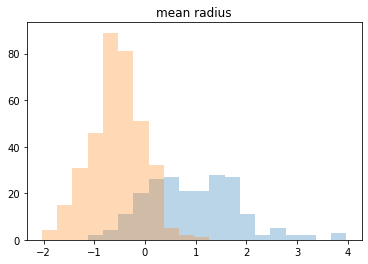

In [15]:
import matplotlib.pyplot as plt
malignant = data[cancer.target==0]
benign = data[cancer.target==1]

plt.hist(malignant[:,0],bins=bins, alpha=0.3)
plt.hist(benign[:,0], bins=bins ,alpha=0.3)
plt.title(cancer.feature_names[0])

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=15)

In [17]:
model = DecisionTreeClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### Random Frest

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



### SVM

In [19]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.95      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.91      0.96      0.94        75

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### SGD Classifier

In [21]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## 결과분석

분석지표 : recall

이유 : 악성암을 일방양성으로 판별하는 것은 환자에게 위험하므로 악성암을 악성함이라고 판정하는 recall이 중요함.